In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('./911.csv')

In [9]:
x = df['title'].iloc[0]

In [10]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

# 911 calls wrt Reasons

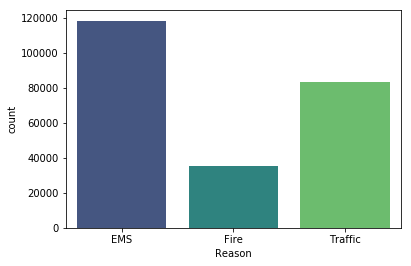

In [17]:
sns.countplot(x='Reason', data=df, palette = 'viridis')

In [18]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [19]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [21]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [22]:
df['Day of Week'] = df['Day of Week'].map(dmap)

# 911 Call counts on Specific days of the week

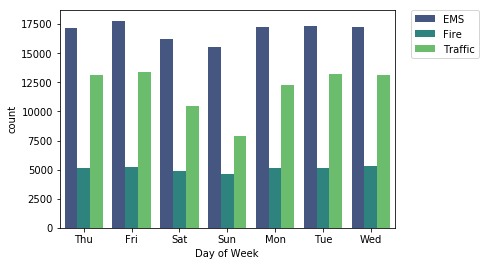

In [28]:
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 911 Call counts on Specific Months

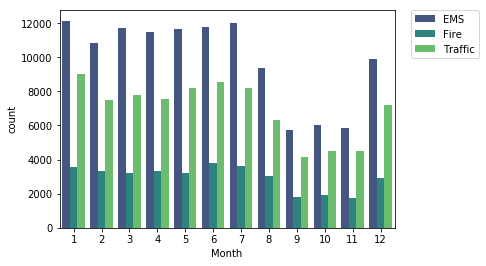

In [29]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [32]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701,24701
2,21663,21663,21663,19161,21663,21663,21658,21663,21663,21663,21663,21663
3,22743,22743,22743,20160,22743,22743,22732,22743,22743,22743,22743,22743
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093


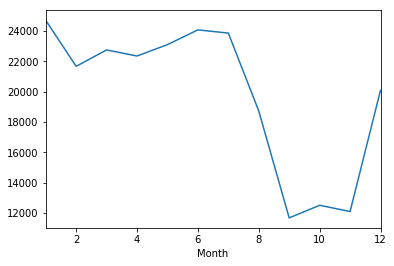

In [34]:
byMonth['lat'].plot()

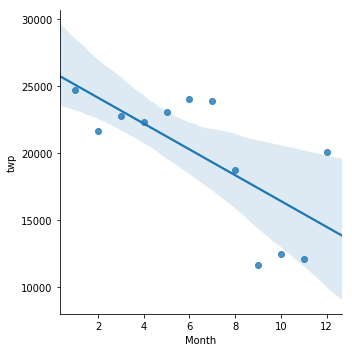

In [63]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [36]:
t = df['timeStamp'].iloc[0]

In [37]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

<function matplotlib.pyplot.tight_layout>

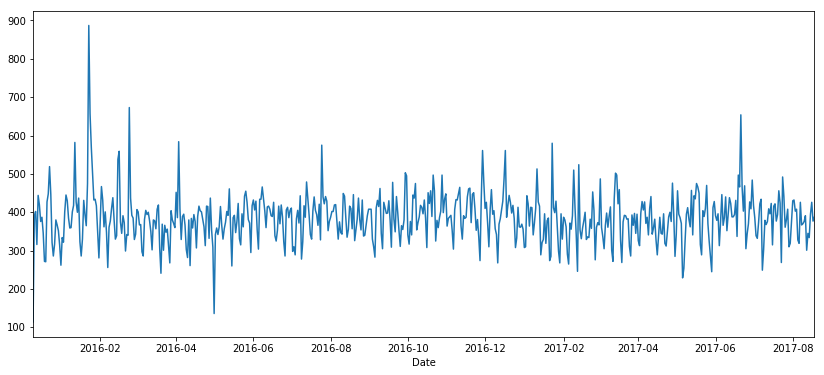

In [59]:
plt.figure(figsize=(14,6))

df.groupby('Date').count()['lat'].plot()
plt.tight_layout

In [52]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()

# Heatmap for Calls wrt Hours of the Day

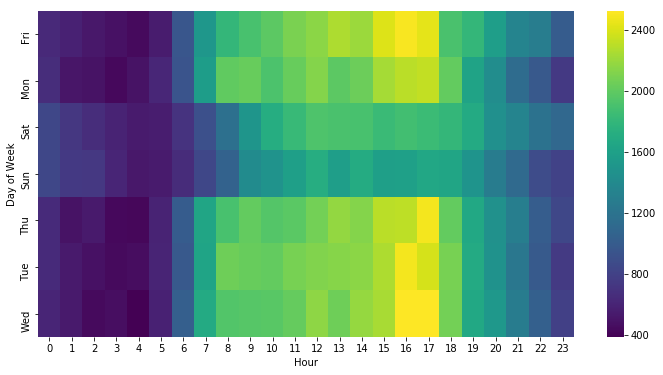

In [54]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')

# Clustermap for Calls wrt Hours of the Day

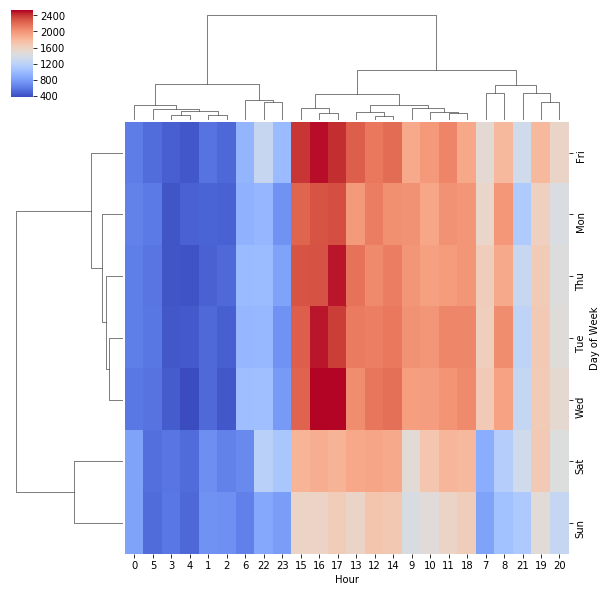

In [66]:
sns.clustermap(dayHour,cmap='coolwarm')

In [67]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()

# Heatmap for Calls wrt Months

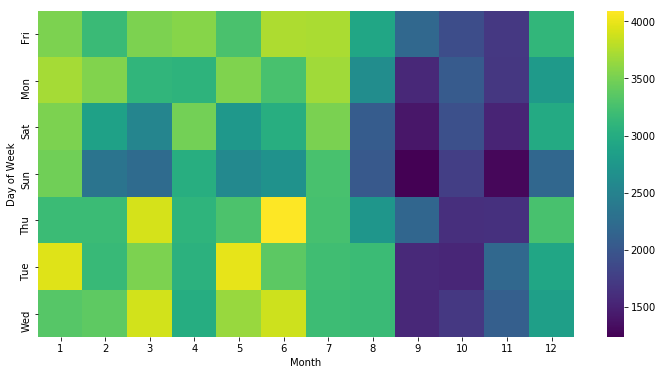

In [68]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='viridis')

# Clustermap for Calls wrt Months

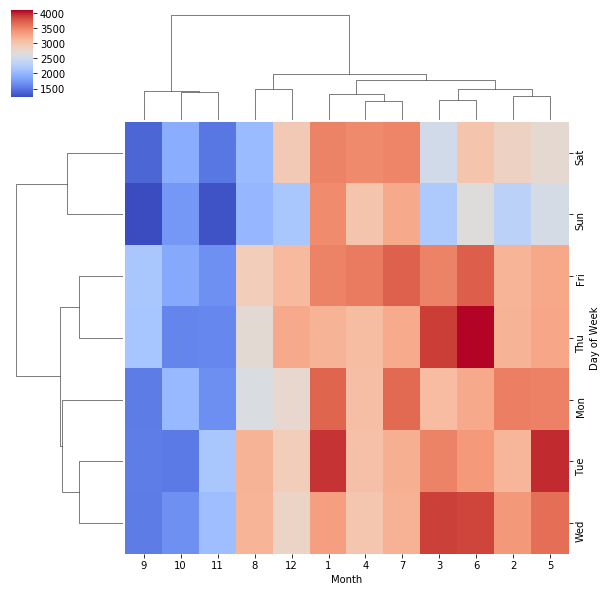

In [69]:
sns.clustermap(dayMonth,cmap='coolwarm')